In [1]:
# correlate effects 

In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
base_path = os.path.dirname(os.getcwd())

ami = pd.read_csv(base_path + '/data/jessen/jessen_effectsize.csv')
ola = pd.read_csv(base_path + '/data/STOPPD/parcelwise_withingroup.csv')
clz = pd.read_csv(base_path + '/data/CLZ44/stats/parcelwise_effectsize.csv')

enigma_data = pd.read_csv(base_path + '/data/ENIGMA/ENIGMA_S32_partial_correlation_between_cortical_thickness_and_chlorpromazine_equivalents.csv')
enigma_data = enigma_data[:-2]

In [44]:
# sanity check that all regions are in the same order
regions = pd.DataFrame({'ola': ola['parcel'], 'clz': clz['parcel'], 'ami':ami['parcel'], 'ENIGMA': enigma_data['region']})
regions

,ola,clz,ami,ENIGMA
0,lh_bankssts_thickness,lh_bankssts_thickness,L_bankssts,Left banks of superior temporal sulcus
1,lh_caudalanteriorcingulate_thickness,lh_caudalanteriorcingulate_thickness,L_caudalanteriorcingulate,Left caudal anterior cingulate cortex
2,lh_caudalmiddlefrontal_thickness,lh_caudalmiddlefrontal_thickness,L_caudalmiddlefrontal,Left caudal middle frontal gyrus
3,lh_cuneus_thickness,lh_cuneus_thickness,L_cuneus,Left cuneus
4,lh_entorhinal_thickness,lh_entorhinal_thickness,L_entorhinal,Left entorhinal cortex
...,...,...,...,...
63,rh_supramarginal_thickness,rh_supramarginal_thickness,R_supramarginal,Right supramarginal gyrus
64,rh_frontalpole_thickness,rh_frontalpole_thickness,R_frontalpole,Right frontal pole
65,rh_temporalpole_thickness,rh_temporalpole_thickness,R_temporalpole,Right temporal pole
66,rh_transversetemporal_thickness,rh_transversetemporal_thickness,R_transversetemporal,Right transverse temporal gyrus


In [53]:
df = pd.DataFrame({'parcel':ola['parcel'], 'Enigma':enigma_data['partial_r'], 'Olanzapine':ola['hedges_g'], 'Clozapine':clz['hedges_g'], 'Amisulpiride':ami['hedges_g'],  })



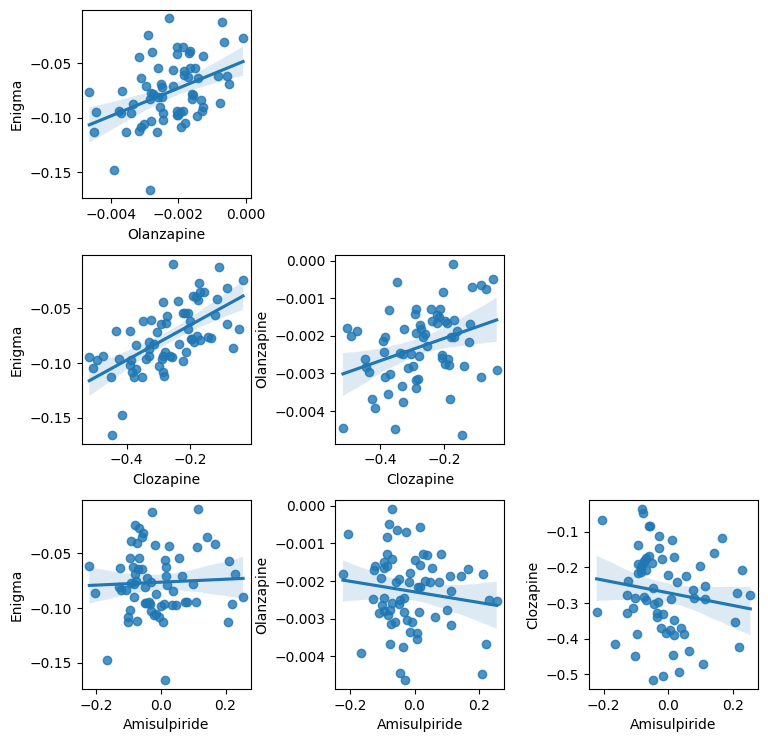

In [55]:
fig, ax = plt.subplots(4,4, figsize=(12,12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

for i, col in enumerate(df.columns[1:]):
    for j, row in enumerate(df.columns[1:]):       
        sns.regplot(df, x=col, y=row, ax=ax[i,j])
        if i <= j:
            ax[i, j].set_visible(False)
            continue


fname = f'{base_path}/figs/all_scatter.jpg'
plt.savefig(fname, dpi=300, bbox_inches='tight')


PearsonRResult(statistic=0.4233185139562289, pvalue=0.0003222280967502019)


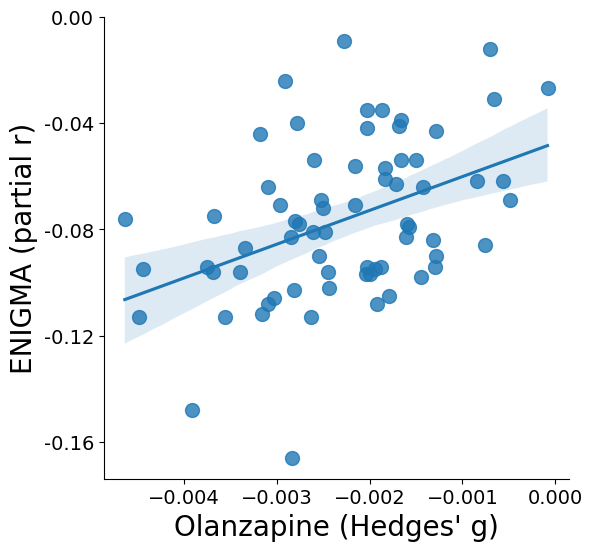

In [58]:
fig  = plt.figure(figsize=(6,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
sns.regplot(df, x='ola', y='enigma', scatter_kws={'s': 100});

fontdict = {'size':20}
plt.xlabel("Olanzapine (Hedges' g)", fontdict=fontdict)
plt.ylabel("ENIGMA (partial r)", fontdict=fontdict)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(ticks=[-0.16, -0.12,  -0.08 ,-0.04, 0.00 ], labels=["-0.16",  "-0.12","-0.08",  "-0.04", "0.00" ]);

print(pearsonr(ola['hedges_g'],enigma_data['partial_r']))

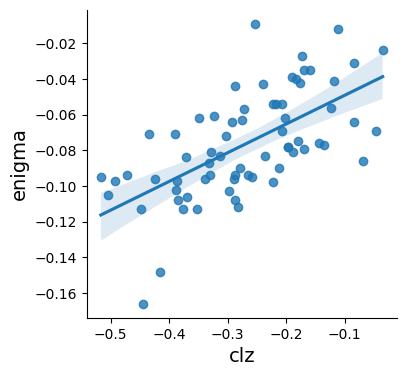

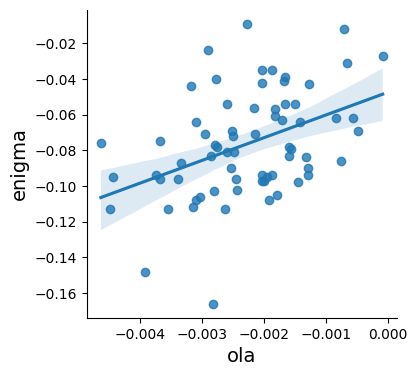

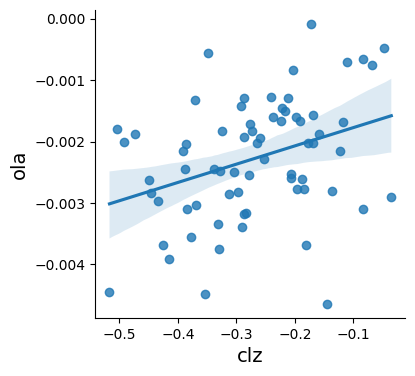

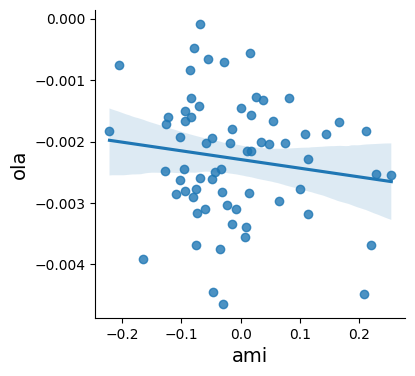

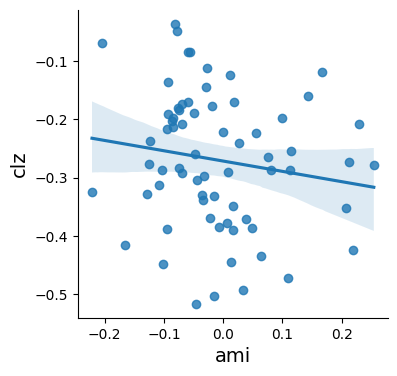

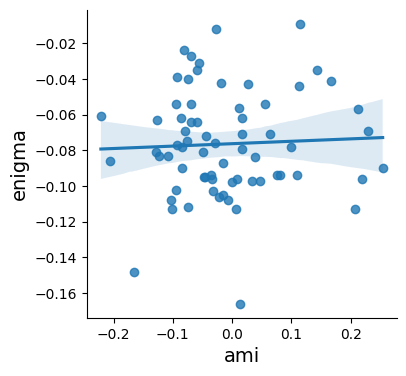

In [27]:
pairs = [('clz', 'enigma'), ('ola', 'enigma'), ('clz', 'ola'), ('ami','ola'), ('ami', 'clz'), ('ami','enigma')]

for p in pairs:
    fig, ax = plt.subplots(figsize=(4,4))
    sns.despine()
    sns.regplot(df, x=p[0], y=p[1])
    ax.set_xlabel(p[0], size=14)
    ax.set_ylabel(p[1], size=14)
    r,_ = pearsonr(df[p[0]],df[p[1]])
    fname = f'{base_path}/figs/{p[0]}_{p[1]}_scatter.jpg'
    plt.savefig(fname, dpi=300, bbox_inches='tight')


In [20]:
df['enigma']

0    -0.063
1    -0.009
2    -0.102
3    -0.031
4    -0.041
      ...  
63   -0.094
64   -0.043
65   -0.061
66   -0.040
67   -0.083
Name: enigma, Length: 68, dtype: float64

In [12]:
pairs = [('clz', 'enigma'), ('ola', 'enigma'), ('clz', 'ola'), ('ami','ola'), ('ami', 'clz'), ('ami','enigma')]


In [14]:
pairs[0][0]

'clz'